<a href="https://colab.research.google.com/github/vtu19744/ENCRYPTIX/blob/main/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
uploaded=files.upload()
df=pd.read_csv('/content/Titanic-Dataset.csv')
df.head()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
missing_values=df.isnull().sum()
missing_values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
categorical_features=df.select_dtypes(include=['object']).columns
numerical_features=df.select_dtypes(include=['int64','float64']).columns
categorical_features,numerical_features

(Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object'),
 Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object'))

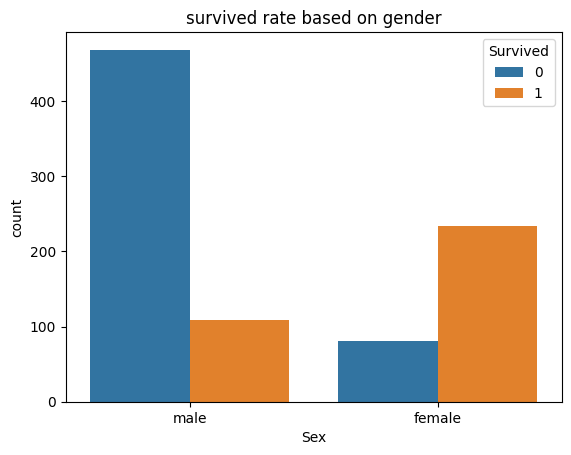

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Sex',hue='Survived',data=df)
plt.title('survived rate based on gender')
plt.show()

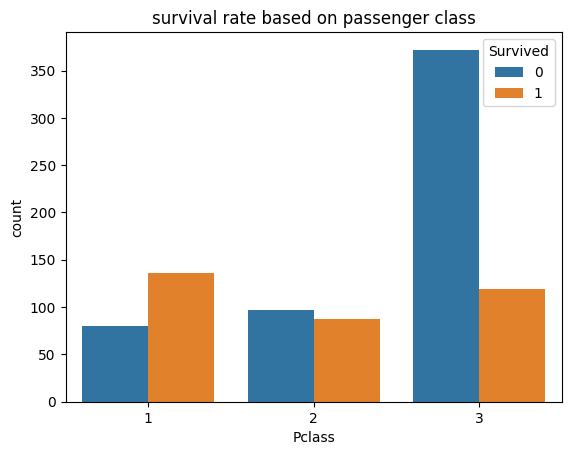

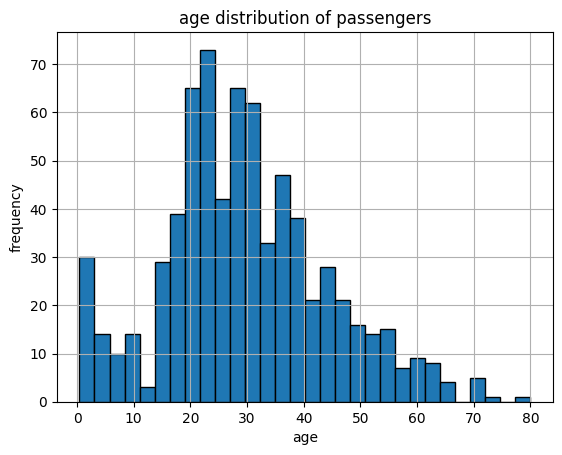

In [ ]:
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title('survival rate based on passenger class')
plt.show()
df['Age'].hist(bins=30,edgecolor='black')
plt.title('age distribution of passengers')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'],inplace=True)
df.isnull().sum()
df=pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)
df.drop(columns=['Name','Ticket','PassengerId'],inplace=True)
df.head()
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Survived'])
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
x=df.drop(columns=['Survived'])
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(random_state=42)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
print('Accuracy:',accuracy)
print('Classification Report:\n',report)

Accuracy: 0.8212290502793296
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
import joblib
joblib_file="titanic_model.joglib"
joblib.dump(clf,joblib_file)
print(f"Model saved to {joblib_file}")

Model saved to titanic_model.joglib


In [ ]:
loaded_model=joblib.load(joblib_file)
loaded_model_predictions=loaded_model.predict(x_test)
loaded_model_accuracy=accuracy_score(y_test, loaded_model_predictions)
loaded_model_report=classification_report(y_test,loaded_model_predictions)
print('Loaded Model Accuracy:',loaded_model_accuracy)
print('Loaded Model Classifications Report:\n',loaded_model_report)


Loaded Model Accuracy: 0.8212290502793296
Loaded Model Classifications Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

